In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree 
from sklearn import preprocessing

In [7]:
#reading the data
df = pd.read_csv('Company_Data.csv')
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [8]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
df.shape

(400, 11)

In [10]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

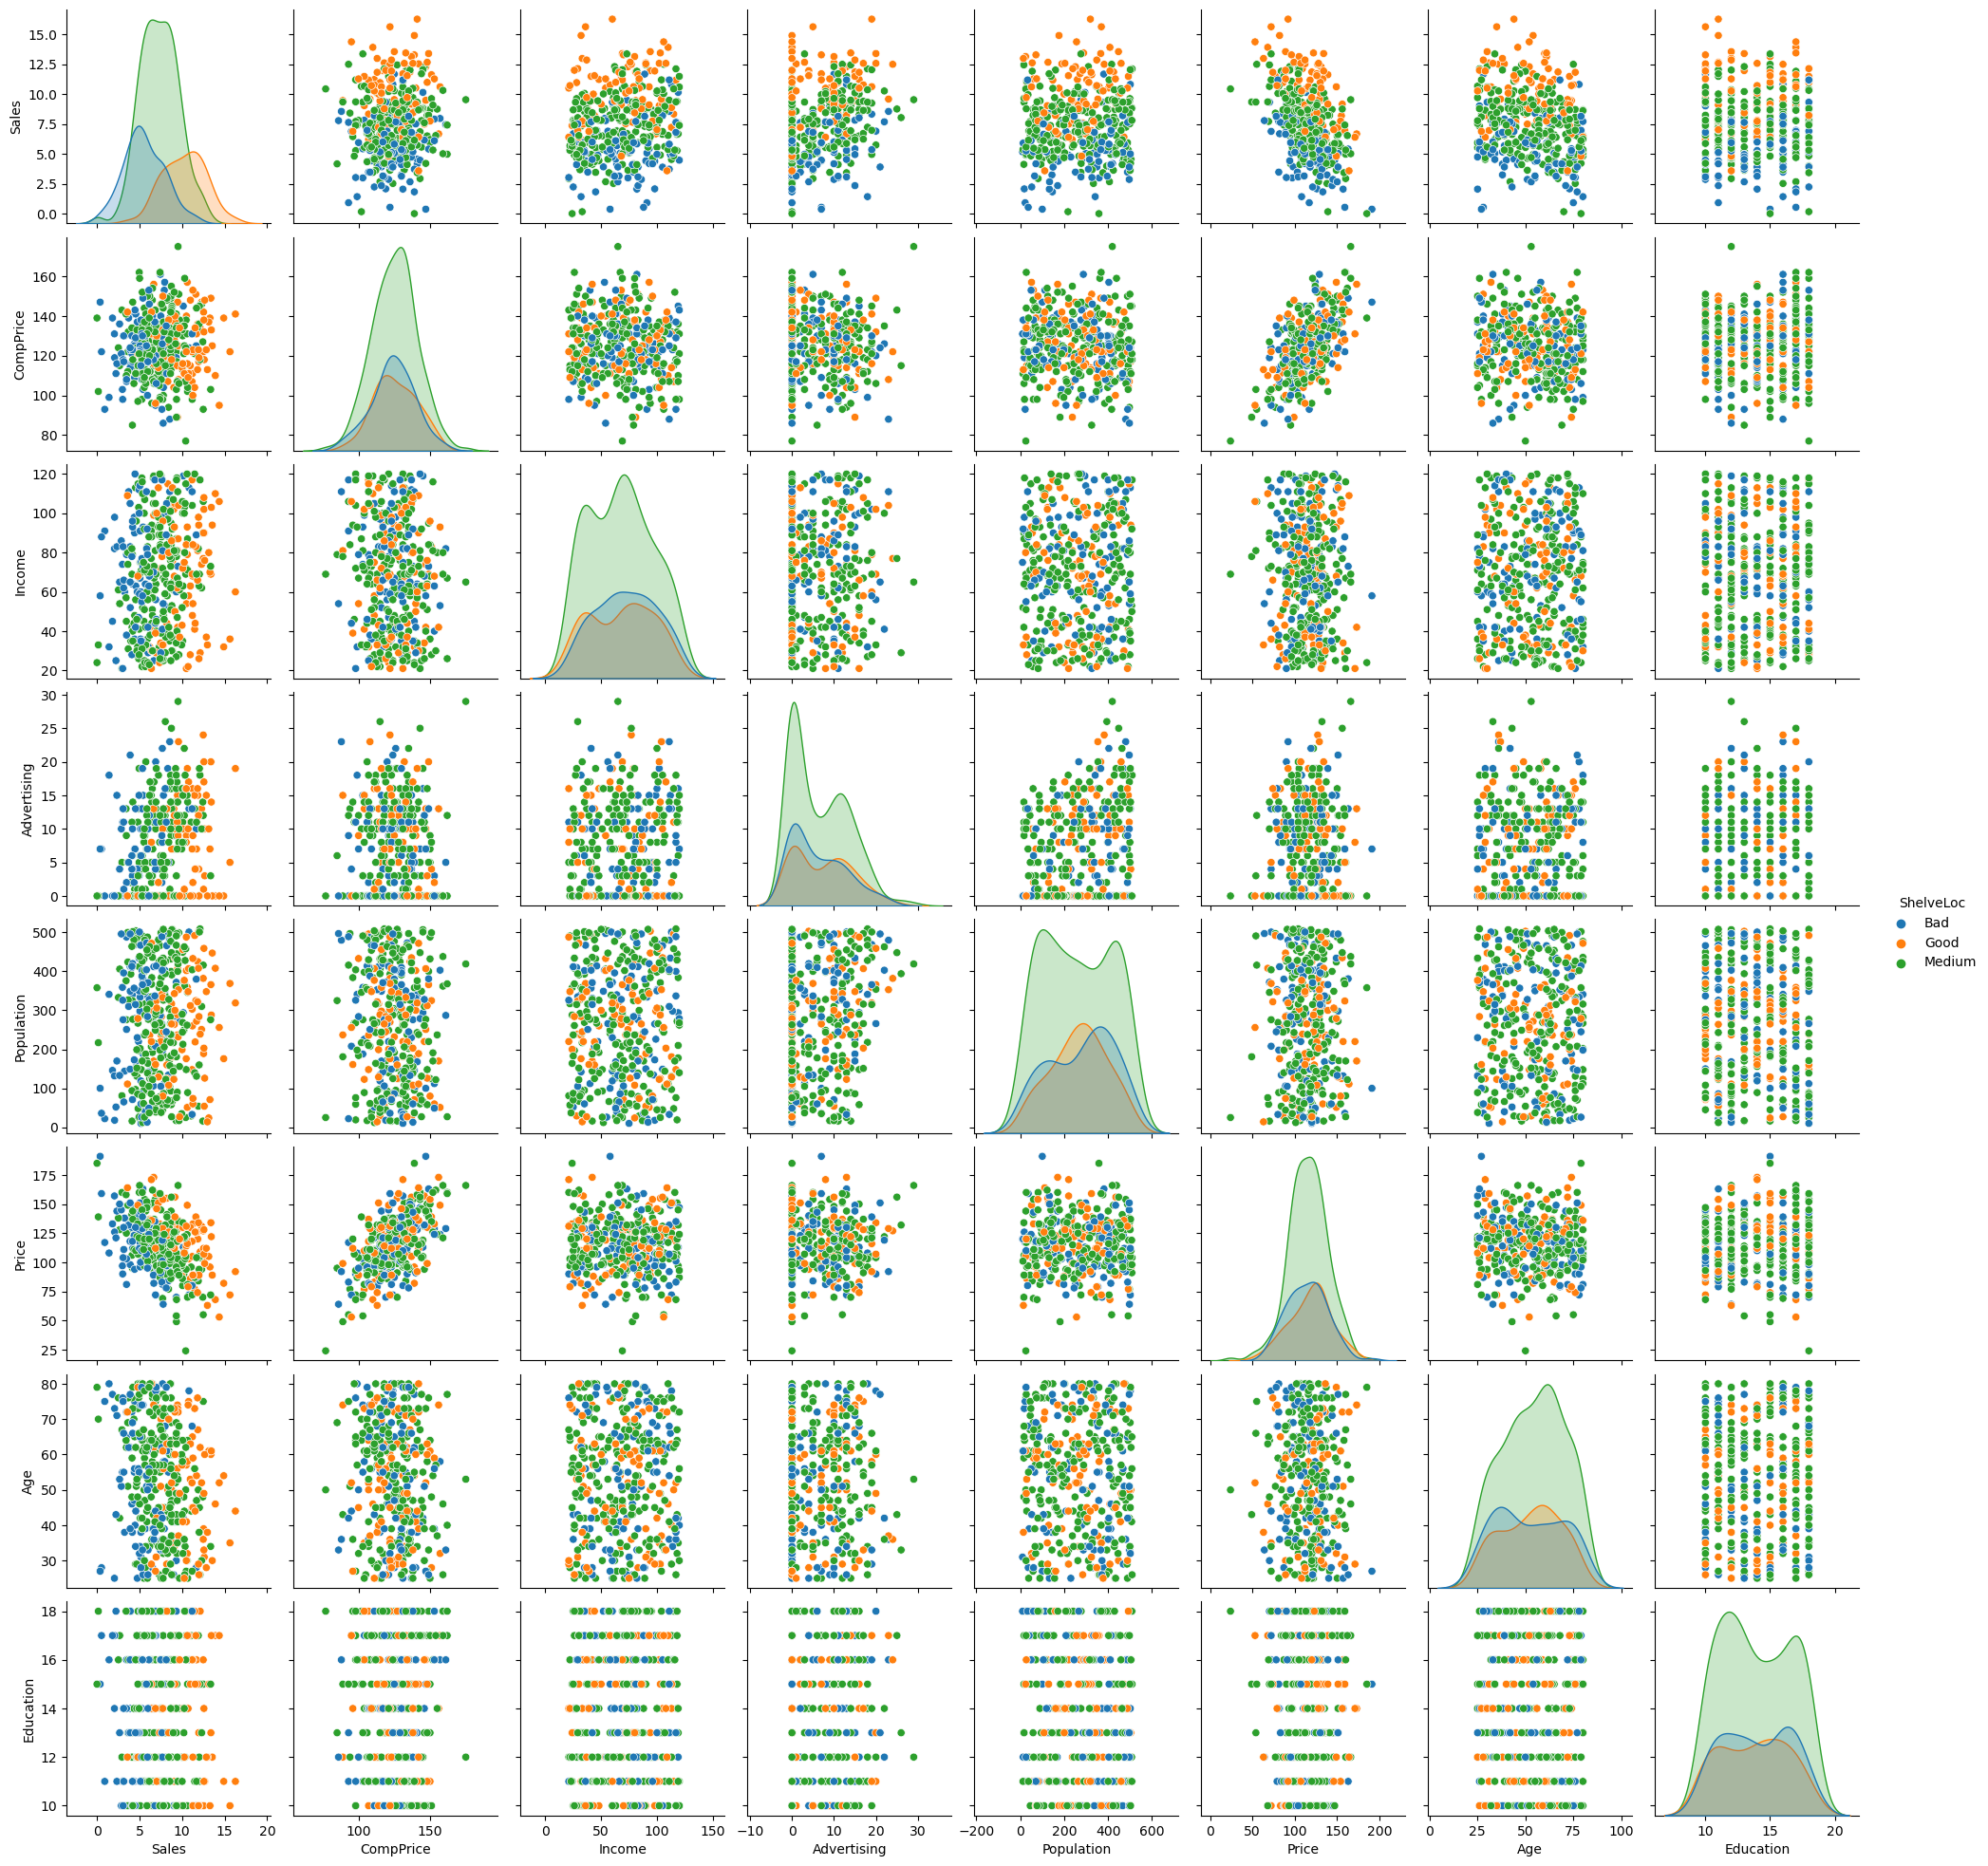

In [11]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'ShelveLoc')

In [12]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [13]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [15]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['Sales']= label_encoder.fit_transform(df['Sales']) 

In [16]:
df['Sales'].value_counts().head(10)

183    4
223    3
243    3
34     3
117    3
103    3
128    3
142    3
135    3
240    2
Name: Sales, dtype: int64

In [17]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0      255        138      73           11         276    120       Bad   42   
1      297        111      48           16         260     83      Good   65   
2      267        113      35           10         269     80    Medium   59   
3      158        117     100            4         466     97    Medium   55   
4       37        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395    320        138     108           17         203    128      Good   33   
396    114        139      23            3          37    120    Medium   55   
397    159        162      26           12         368    159    Medium   40   
398    106        100      79            7         284     95       Bad   50   
399    262        134      37            0          27    120      Good   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [18]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 

In [19]:
df['ShelveLoc'].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [20]:
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      255        138      73           11         276    120          0   42   
1      297        111      48           16         260     83          1   65   
2      267        113      35           10         269     80          2   59   
3      158        117     100            4         466     97          2   55   
4       37        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395    320        138     108           17         203    128          1   33   
396    114        139      23            3          37    120          2   55   
397    159        162      26           12         368    159          2   40   
398    106        100      79            7         284     95          0   50   
399    262        134      37            0          27    120          1   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [21]:
x=df.iloc[:,1:]
y=df['Sales']
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 10 columns]

In [22]:
y

0      255
1      297
2      267
3      158
4       37
      ... 
395    320
396    114
397    159
398    106
399    262
Name: Sales, Length: 400, dtype: int64

In [23]:
# # Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [24]:
x_train

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
85         125     103            0         304    112          2   49   
69         127      59            0         339     99          2   65   
203        131      82            0         132    157          0   25   
379        125     111            0         404    107          0   54   
261        121      42            4         188    118          2   54   
..         ...     ...          ...         ...    ...        ...  ...   
306        131      32            1          85    133          2   48   
165        147      58            7         100    191          0   27   
7          136      81           15         425    120          1   67   
219        116      79           19         359    116          1   58   
326        133      30            0         152    122          2   53   

     Education  Urban_Yes  US_Yes  
85          13          0       0  
69          12          1       0  
203         14          1       0  
379         15          1       0  
261         15          1       1  
..         ...        ...     ...  
306         12          1       1  
165         15          1       1  
7           10          1       1  
219         17          1       1  
326         17          1       0  

[320 rows x 10 columns]

In [25]:
y_train

85     208
69     190
203      7
379    100
261     97
      ... 
306     57
165      2
7      306
219    285
326     55
Name: Sales, Length: 320, dtype: int64

In [26]:
df['Sales'].unique()


array([255, 297, 267, 158,  37, 290, 133, 306, 129,  55, 234, 309,  33,
       291, 294, 219, 170, 315, 331, 220, 122, 314,  71, 103, 271, 333,
       203,  77,  16, 184, 330, 200, 117, 223,  13, 293, 230,  63, 131,
        21,   8, 189, 277,  36,  38,  51, 317,  45,  32, 284,   5,  46,
       187, 145,  61, 140, 307,   4,  86,  75, 202, 154,   6, 208, 183,
       227, 328, 190, 252, 126,  88, 321, 210, 286, 177,  47, 239, 191,
       165, 302,   9, 218, 304, 130, 188,  82,  58,  49, 228, 204,  93,
       253, 162, 318,  60,  35,  79,  70,  52,  90,   1,  24, 232, 233,
       132, 135, 110, 242, 209, 226, 169, 156, 141, 303, 142, 196, 229,
       245, 298, 127,  64,  48, 205, 257, 172,  28, 125,  74, 274, 316,
       111, 128, 161,   3, 237,  31, 282, 168, 300, 280, 289, 174, 105,
       143, 178, 163, 272, 319, 243,  53,  15,  27,  96, 198,   2, 137,
       153, 235, 120,   0, 167,  94, 279, 287, 182,  62, 160,  56,  81,
       263, 268, 216, 193, 313, 225, 326, 152,  40,  34,  11,  2

In [27]:
num =[255, 297, 267, 158,  37, 290, 133, 306, 129,  55, 234, 309,  33,
       291, 294, 219, 170, 315, 331, 220, 122, 314,  71, 103, 271, 333,
       203,  77,  16, 184, 330, 200, 117, 223,  13, 293, 230,  63, 131,
        21,   8, 189, 277,  36,  38,  51, 317,  45,  32, 284,   5,  46,
       187, 145,  61, 140, 307,   4,  86,  75, 202, 154,   6, 208, 183,
       227, 328, 190, 252, 126,  88, 321, 210, 286, 177,  47, 239, 191,
       165, 302,   9, 218, 304, 130, 188,  82,  58,  49, 228, 204,  93,
       253, 162, 318,  60,  35,  79,  70,  52,  90,   1,  24, 232, 233,
       132, 135, 110, 242, 209, 226, 169, 156, 141, 303, 142, 196, 229,
       245, 298, 127,  64,  48, 205, 257, 172,  28, 125,  74, 274, 316,
       111, 128, 161,   3, 237,  31, 282, 168, 300, 280, 289, 174, 105,
       143, 178, 163, 272, 319, 243,  53,  15,  27,  96, 198,   2, 137,
       153, 235, 120,   0, 167,  94, 279, 287, 182,  62, 160,  56,  81,
       263, 268, 216, 193, 313, 225, 326, 152,  40,  34,  11,  26, 123,
        91, 106,   7, 221,  65,  17,  44, 247, 312, 199,  59,  10,  98,
        43, 261, 285, 283, 124,  23, 136, 217,  85, 296,  73, 194, 325,
       214, 249,  89, 259, 155,  30, 275, 311,  54, 185, 224, 264, 144,
        68,  84,  69, 240,  29, 201,  95, 258,  41, 215,  72, 175,  97,
       119, 181, 147,  80, 238, 101,  67, 310,  50, 324, 266, 151, 146,
        22,  14, 180, 148, 171, 166, 149, 222, 254, 134, 305, 299, 322,
        42, 197,  18, 292, 248, 211, 159,  78, 265, 308, 192,  57, 104,
       241, 295, 256, 115, 138, 244, 179, 121, 334, 269, 102, 276,  12,
       118,  20,  66, 270,  99, 173, 116, 212, 107, 301, 164, 157, 109,
       206, 231, 320, 213, 278, 329, 251, 150,  25, 327,  39,  19,  76,
       273, 281, 108, 332, 288, 176, 236, 250, 186, 335, 139, 113, 100,
       260, 246, 323, 195, 207,  87, 112,  92,  83, 114, 262]
converted_num = str(num)
print("Type After conversion : ",type(converted_num))

Type After conversion :  <class 'str'>


In [28]:
converted_num

'[255, 297, 267, 158, 37, 290, 133, 306, 129, 55, 234, 309, 33, 291, 294, 219, 170, 315, 331, 220, 122, 314, 71, 103, 271, 333, 203, 77, 16, 184, 330, 200, 117, 223, 13, 293, 230, 63, 131, 21, 8, 189, 277, 36, 38, 51, 317, 45, 32, 284, 5, 46, 187, 145, 61, 140, 307, 4, 86, 75, 202, 154, 6, 208, 183, 227, 328, 190, 252, 126, 88, 321, 210, 286, 177, 47, 239, 191, 165, 302, 9, 218, 304, 130, 188, 82, 58, 49, 228, 204, 93, 253, 162, 318, 60, 35, 79, 70, 52, 90, 1, 24, 232, 233, 132, 135, 110, 242, 209, 226, 169, 156, 141, 303, 142, 196, 229, 245, 298, 127, 64, 48, 205, 257, 172, 28, 125, 74, 274, 316, 111, 128, 161, 3, 237, 31, 282, 168, 300, 280, 289, 174, 105, 143, 178, 163, 272, 319, 243, 53, 15, 27, 96, 198, 2, 137, 153, 235, 120, 0, 167, 94, 279, 287, 182, 62, 160, 56, 81, 263, 268, 216, 193, 313, 225, 326, 152, 40, 34, 11, 26, 123, 91, 106, 7, 221, 65, 17, 44, 247, 312, 199, 59, 10, 98, 43, 261, 285, 283, 124, 23, 136, 217, 85, 296, 73, 194, 325, 214, 249, 89, 259, 155, 30, 275, 311,

# Building Decision Tree Classifier using Entropy Criteria

In [29]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
from sklearn import tree

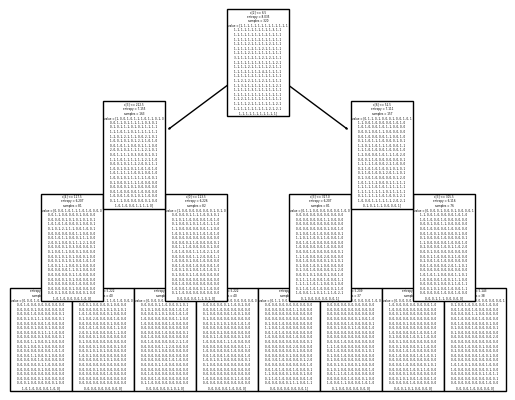

In [31]:
#PLot the decision tree
tree.plot_tree(model);

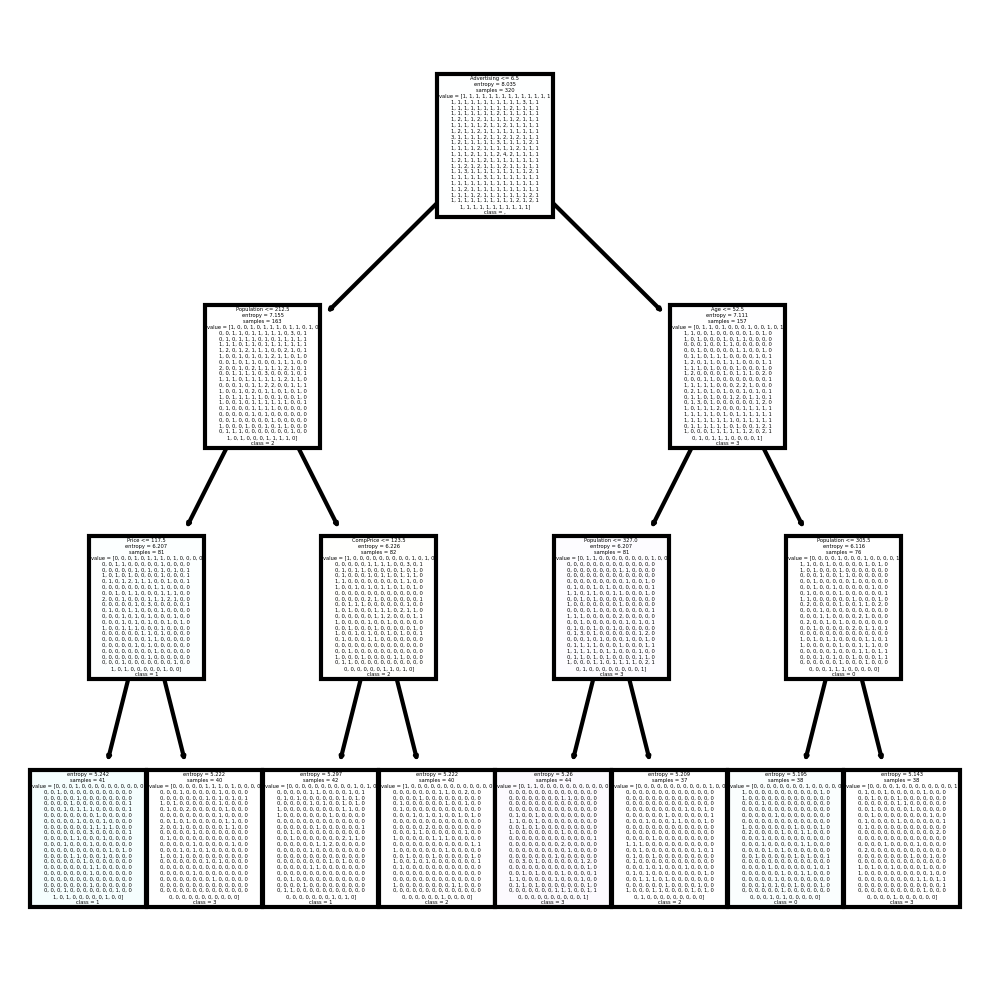

In [32]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_Yes','US_Yes']
cn=converted_num
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);

In [33]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

165    18
135    15
74     14
34     10
142     8
14      7
148     6
223     2
dtype: int64

In [34]:
preds

array([135, 135, 148, 165, 142,  34,  14, 142,  74, 148, 165, 165, 148,
       142,  14, 165,  14, 165,  74,  74, 135, 142,  34, 223, 135,  74,
        14,  34,  74, 135, 165,  74, 148,  14,  74, 142, 135,  34, 223,
        74, 135, 165,  74,  34, 142, 135,  34, 142,  34,  74, 165,  74,
        14, 165,  14, 148, 148, 165, 165,  74, 165, 135, 165,  34, 142,
        34, 165, 165,  74, 135, 135, 135, 165,  74, 165, 135,  34, 165,
       135, 135], dtype=int64)

In [35]:
pd.crosstab(y_test,preds) 

col_0  14   34   74   135  142  148  165  223
Sales                                        
1        0    0    0    0    0    0    1    0
6        0    0    1    0    0    0    0    0
11       0    1    0    0    0    0    0    0
15       0    0    1    0    0    0    0    0
23       0    0    0    1    0    0    0    0
...    ...  ...  ...  ...  ...  ...  ...  ...
305      0    0    0    0    0    1    0    0
307      0    0    0    0    1    0    0    0
325      0    0    0    1    0    0    0    0
327      0    0    0    0    0    0    1    0
331      0    0    0    0    0    0    1    0

[77 rows x 8 columns]

In [36]:
# Accuracy 
np.mean(preds==y_test)

0.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [38]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.0

# Decision Tree Regression Example

In [48]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [49]:
array = df.values
array

array([[255, 138,  73, ...,  17,   1,   1],
       [297, 111,  48, ...,  10,   1,   1],
       [267, 113,  35, ...,  12,   1,   1],
       ...,
       [159, 162,  26, ...,  18,   1,   1],
       [106, 100,  79, ...,  12,   1,   1],
       [262, 134,  37, ...,  16,   1,   1]], dtype=int64)

In [50]:
X = array[:,1:]
y = array[:,0]

In [51]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 10 columns]

In [52]:
y

array([255, 297, 267, 158,  37, 290, 133, 306, 129,  55, 234, 309,  33,
       291, 294, 219, 170, 315, 331, 220, 122, 314,  71, 103, 271, 333,
       203,  77,  16, 184, 330, 200, 117, 223,  13, 293, 230,  63, 131,
        21,   8, 189, 277,  36,  38,  51, 317,  45,  32, 284,   5,  46,
       187, 145,  61, 140, 307,   4,  86,  75, 202, 154,   6, 208, 183,
        61, 227, 234, 328, 190, 252, 126,  88, 321, 117, 210, 286, 177,
        47, 239, 191, 165, 302,  46,   9, 208, 218, 304, 130, 188,  82,
        58,  49, 228, 204,  93, 253, 162, 318,  60,  35, 117,  79,  70,
        52,  90,   1, 210,  24, 232, 233, 132, 135, 110, 242, 209,  71,
       226, 169, 156, 141, 303, 142, 196, 229, 245, 298, 127,  64,  48,
       205, 126, 257, 172,  28, 125,  74, 127, 274, 316, 111, 128, 161,
         3, 237, 223,  31, 282, 168, 300, 280, 289, 174, 105, 143, 178,
       163, 272, 319, 243,  53,  15,  27,  96, 198,   2, 137, 137, 153,
       300, 191, 318, 235, 120,   0, 167,  94, 279, 287, 182,  6

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [54]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
#Find the accuracy
model.score(X_test,y_test)

0.338292952801565